<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#0e246f; font-size:40px'> Exploratory Data Analysis </h1>
</div>


<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#0e246f; font-size:30px'> Approach </h1>
</div>


<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#0e246f; font-size:18px'> 1- Analyze the Below columns  </h1>
</div>




- SK_ID_CURR
- TARGET
- NAME_CONTRACT_TYPE
- CODE_GENDER
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- CNT_CHILDREN
- AMT_INCOME_TOTAL
- AMT_CREDIT
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- DAYS_BIRTH
- DAYS_EMPLOYED
- CNT_FAM_MEMBERS
- ORGANIZATION_TYPE


<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#0e246f; font-size:18px'>2- For each column</h1>
</div>


- Find split by individual constituents of the variable
- Split by the Target variable =0
- Split by the Target variable =1

<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#0e246f; font-size:18px'>3- Find Corelation between Target values (0/1) of different columns</h1>
</div>

<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#6f0e14; font-size:30px'> Problem Encountered </h1>
</div>


General

- The time provided is too little
- No partner was provided


Dataset and Problem Statement 

- The data is insufficient to deal with/answer a lt of questions


<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#6f0e14; font-size:30px'> Reason for analyzing the Datasheets independently </h1>
</div>


The decision on - Should I join both the datasets and analyze together or analyze independently
- application_data.csv
- previous_application.csv

Given, the only common columns are as below. Therefore I analyze both the datasheets independently

### Common Columns 

In [190]:
a = list(appdata.columns)
b = list(prev.columns)
match = []
for x in a:
    if x in b:
        match.append(x)
for x in match:
    print(x)

SK_ID_CURR
NAME_CONTRACT_TYPE
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Import the Libraries</h2>
</div>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Data Frame</h2>
</div>

In [5]:
appdata = pd.read_csv('D:\\application_data.csv')

In [189]:
prev = pd.read_csv('D:\\previous_application.csv')

Create a new dataframe with refined list of columns to base the investigation on

In [6]:
current = appdata[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','ORGANIZATION_TYPE']]

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Data Wrangling</h2>
</div>

In [102]:
import warnings
warnings.filterwarnings("ignore")

In [103]:
current['NAME_EDUCATION_TYPE'] = current['NAME_EDUCATION_TYPE'].astype("string")
current['NAME_EDUCATION_TYPE'].dtype
current['NAME_EDUCATION_TYPE'] = current['NAME_EDUCATION_TYPE'].replace('Academic degree' ,'ACADEMIC')
current['NAME_INCOME_TYPE'] = current['NAME_INCOME_TYPE'].astype("string")
current['NAME_INCOME_TYPE'].dtype
current['NAME_INCOME_TYPE'] = current['NAME_INCOME_TYPE'].replace('State servant' ,'State')
current['NAME_INCOME_TYPE'] = current['NAME_INCOME_TYPE'].replace('Commercial associate' ,'associate')
current['NAME_INCOME_TYPE'] = current['NAME_INCOME_TYPE'].replace('Maternity leave' ,'Maternity');
current['NAME_INCOME_TYPE'].unique();
current['NAME_FAMILY_STATUS'] = current['NAME_FAMILY_STATUS'].astype("string")
current['NAME_FAMILY_STATUS'] = current['NAME_FAMILY_STATUS'].replace('Single / not married' ,'Single')
current['NAME_FAMILY_STATUS'] = current['NAME_FAMILY_STATUS'].replace('Civil marriage' ,'Civil M')

<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Beginning of EDA </h1>
</div>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Education Type</h2>
</div>

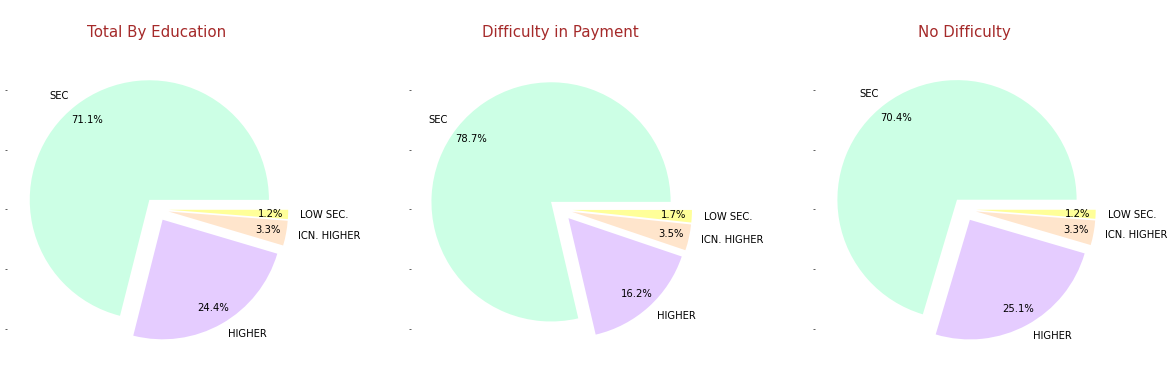

In [208]:
fig, axes = plt.subplots(ncols=3, sharey=True, sharex=False)
#fig.suptitle("Categorical Unordered Univariate Analysis\n\n", fontsize=30, color='')

colors = ['#CCFFE5', '#E5CCFF', '#FFE5CC','#FFFF99']
#explode = (0.1, 0.1, 0.1, 0.1)

current[current['NAME_EDUCATION_TYPE']!='ACADEMIC']['NAME_EDUCATION_TYPE'].value_counts().plot.pie(ax=axes[0],colors=colors, autopct='%1.1f%%',pctdistance=0.85,explode=explode)
axes[0].set_title("\nTotal By Education\n",fontsize=15, color='Brown')
axes[0].set_ylabel("")


current[(current['TARGET']==1)&(current['NAME_EDUCATION_TYPE']!='ACADEMIC')]['NAME_EDUCATION_TYPE'].value_counts().plot.pie(ax=axes[1],colors=colors, autopct='%1.1f%%',pctdistance=0.85,explode=explode)
axes[1].set_title("\nDifficulty in Payment\n",fontsize=15, color='Brown')
                
current[(current['TARGET']==0)&(current['NAME_EDUCATION_TYPE']!='ACADEMIC')]['NAME_EDUCATION_TYPE'].value_counts().plot.pie(ax=axes[2],colors=colors, autopct='%1.1f%%',pctdistance=0.85,explode=explode)
axes[2].set_title("\nNo Difficulty\n",fontsize=15, color='Brown')
        

fig.set_size_inches(20.5, 5.5, forward=True)

plt.show();

In [195]:
current[current['NAME_EDUCATION_TYPE']!='ACADEMIC'].groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts(normalize=True)

NAME_EDUCATION_TYPE            TARGET
Higher education               0         0.946449
                               1         0.053551
Incomplete higher              0         0.915150
                               1         0.084850
Lower secondary                0         0.890723
                               1         0.109277
Secondary / secondary special  0         0.910601
                               1         0.089399
Name: TARGET, dtype: float64

<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#6495ED; font-size:18px'>Conclusion</h1>
</div>

- Majority of applicants have Secondary education, followed by higher education
- Only 5% in the Higher education category; that forms 16% of total applicants with payment difficulty- This group is profitable .
- Applicants with lower secondary education have most difficulty with payments

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Income Type</h2>
</div>

In [4]:
data = current.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts().unstack()
data.fillna(0)

TARGET,0,1
NAME_INCOME_TYPE,,
Businessman,10.0,0.0
Commercial associate,66257.0,5360.0
Maternity leave,3.0,2.0
Pensioner,52380.0,2982.0
State servant,20454.0,1249.0
Student,18.0,0.0
Unemployed,14.0,8.0
Working,143550.0,15224.0


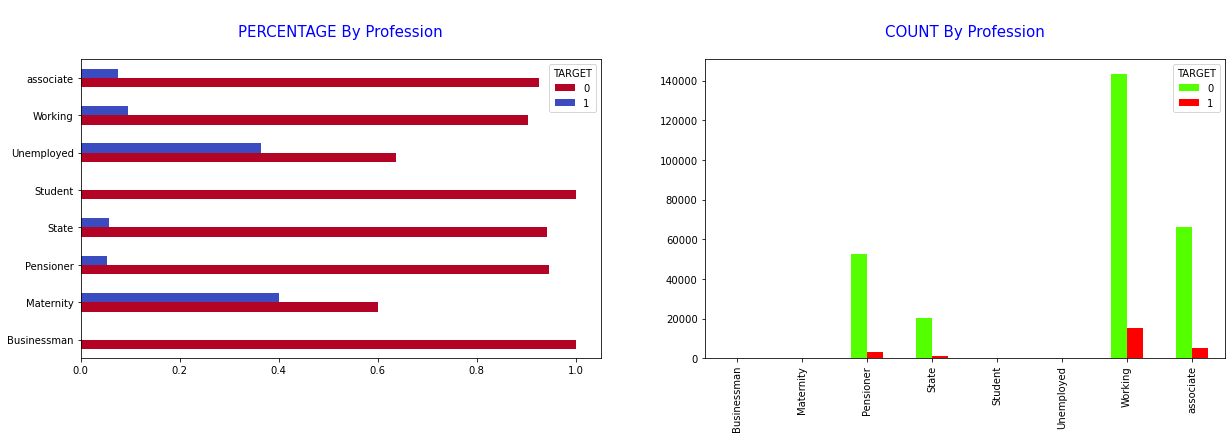

In [198]:
fig, axes = plt.subplots(ncols=2, sharey=False, sharex=False)

current.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts(normalize=True).unstack().plot.barh(ax=axes[0], colormap='coolwarm_r')
axes[0].set_title("\nPERCENTAGE By Profession\n",fontsize=15, color='Blue')
axes[0].set_ylabel("")



current.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts().unstack().plot.bar(ax=axes[1],colormap='prism_r')
axes[1].set_title("\nCOUNT By Profession\n",fontsize=15, color='Blue')
axes[1].set_xlabel("")

fig.set_size_inches(20.5, 5.5, forward=True)

plt.show()

<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#6495ED; font-size:18px'>Conclusion</h1>
</div>

- Within the individual profession category; applicants on maternity leave and unemployed have the highest default %age
- Associate is the best performing segement by profession

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Family Status</h2>
</div>

In [53]:
current.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts()

NAME_FAMILY_STATUS  TARGET
Civil M             0          26814
                    1           2961
Married             0         181582
                    1          14850
Separated           0          18150
                    1           1620
Single              0          40987
                    1           4457
Unknown             0              2
Widow               0          15151
                    1            937
Name: TARGET, dtype: int64

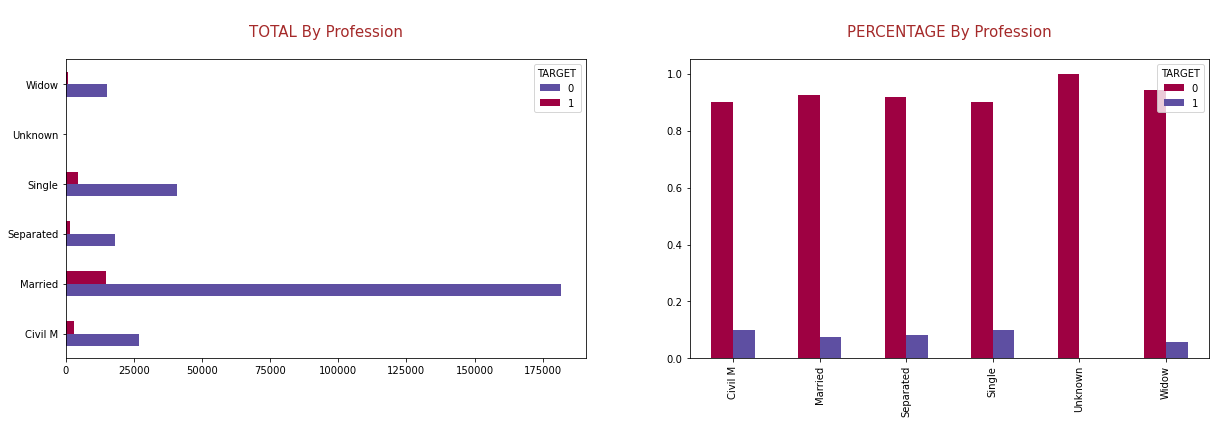

In [206]:
fig, axes = plt.subplots(ncols=2, sharey=False, sharex=False)

current.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts().unstack().plot.barh(ax=axes[0], colormap='Spectral_r')
axes[0].set_title("\nTOTAL By Profession\n",fontsize=15, color='Brown')
axes[0].set_ylabel("")



current.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts(normalize=True).unstack().plot.bar(ax=axes[1], colormap='Spectral')
axes[1].set_title("\nPERCENTAGE By Profession\n",fontsize=15, color='Brown')
axes[1].set_xlabel("")

fig.set_size_inches(20.5, 5.5, forward=True)

plt.show()

<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#6495ED; font-size:18px'>Conclusion</h1>
</div>

- Married people have lesser difficulty with payments as compared to separated ones
- Widows are quite sincere with payments
- applicants with Civil marriage and singletons are at the same level on ease of making payments

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Housing Type</h2>
</div>

In [58]:
current.groupby('NAME_HOUSING_TYPE')['TARGET'].value_counts()

NAME_HOUSING_TYPE    TARGET
Co-op apartment      0           1033
                     1             89
House / apartment    0         251596
                     1          21272
Municipal apartment  0          10228
                     1            955
Office apartment     0           2445
                     1            172
Rented apartment     0           4280
                     1            601
With parents         0          13104
                     1           1736
Name: TARGET, dtype: int64

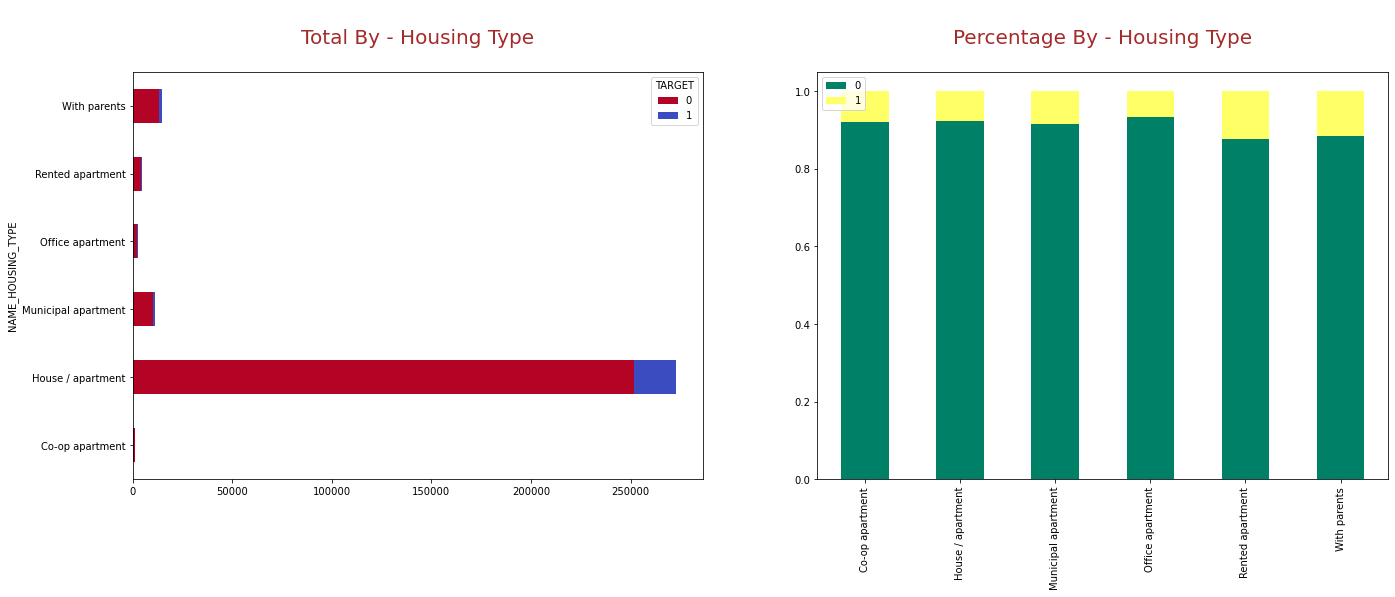

In [178]:
fig, axes = plt.subplots(ncols=2, sharey=False, sharex=False)
#fig.suptitle("Categorical Unordered Univariate Analysis\n\n", fontsize=30)

current.groupby('NAME_HOUSING_TYPE')['TARGET'].value_counts().unstack().plot.barh(stacked=True,ax=axes[0], colormap='coolwarm_r')
axes[0].set_title("\nTotal By - Housing Type\n",fontsize=20, color='Brown')
axes[0].set_xlabel("")

current.groupby('NAME_HOUSING_TYPE')['TARGET'].value_counts(normalize=True).unstack().plot.bar(stacked=True,ax=axes[1], colormap='summer')
axes[1].set_title("\nPercentage By - Housing Type\n",fontsize=20, color='Brown')
axes[1].set_xlabel("")
axes[1].legend(loc="upper left")

fig.set_size_inches(22.5, 7.5, forward=True)

plt.show()

<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#6495ED; font-size:18px'>Conclusion</h1>
</div>

- Applicants living in Rented apartments or living with parenrts have considerable difficulty with making payments 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Annual Income</h2>
</div>

### Assuming that 

- the annual income of a person is -AMT_INCOME_TOTAL 
- the loan amount is - AMT_CREDIT. 
- the collateral/mortgage is 'AMT_GOODS_PRICE'
- I create a new column BAL - appdata['BAL'] = appdata['AMT_INCOME_TOTAL']-(appdata['AMT_CREDIT']+appdata['AMT_GOODS_PRICE'])
- In cases where BAL < 0; I classify as High Risk ()
- In cases where BAL > 0; I classify as Low Risk

This did not work because, there are a lot of factors that need to be accounted for . 
Instalment period. Number of intallemnts paid. number outstanding etc. So I've given 
up the idea of being too fancy 

In [104]:
bins = [0,50000,100000,200000,500000,200000000]
labels = ['Upto-50k','50-100K','100-200K','200-500K','Beyond-500K']
current['Earning'] = pd.cut(current['AMT_INCOME_TOTAL'], bins, labels=labels);

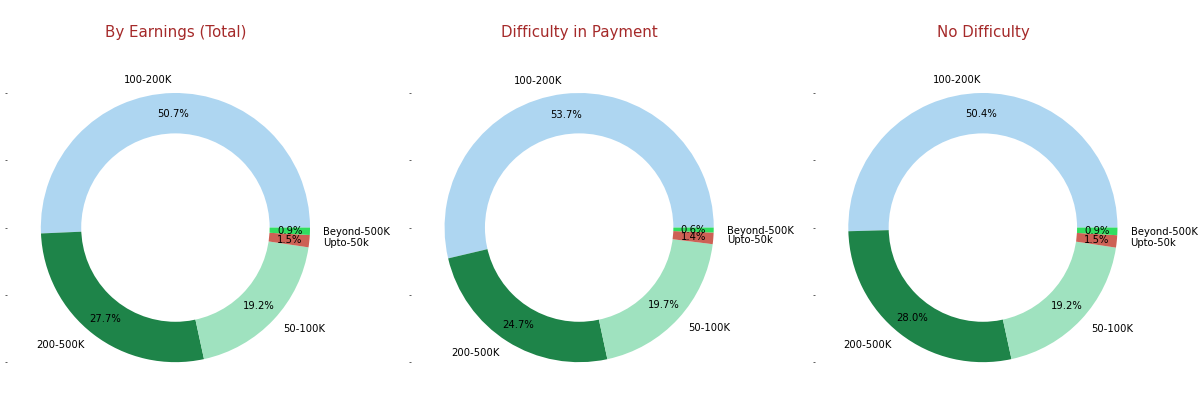

In [181]:
fig, axes = plt.subplots(ncols=3, sharey=True, sharex=False)
#fig.suptitle("Categorical Unordered Univariate Analysis\n\n", fontsize=30, color='')

colors = ['#aed6f1', '#1e8449', '#9FE2BF','#cd6155','#31de60']
explode = (0.0, 0.0, 0.0, 0.0,0.0)

current['Earning'].value_counts().plot.pie(ax=axes[0],colors=colors, autopct='%1.1f%%',pctdistance=0.85,explode=explode)
axes[0].set_title("\nBy Earnings (Total)\n",fontsize=15, color='Brown')
axes[0].set_ylabel("")
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[0].add_artist(centre_circle)


current[current['TARGET'] ==1]['Earning'].value_counts().plot.pie(ax=axes[1],colors=colors, autopct='%1.1f%%',pctdistance=0.85,explode=explode)
axes[1].set_title("\nDifficulty in Payment\n",fontsize=15, color='Brown')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[1].add_artist(centre_circle)


                
current[current['TARGET'] ==0]['Earning'].value_counts().plot.pie(ax=axes[2],colors=colors, autopct='%1.1f%%',pctdistance=0.85,explode=explode)
axes[2].set_title("\nNo Difficulty\n",fontsize=15, color='Brown')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[2].add_artist(centre_circle)




fig.set_size_inches(20.5, 7.5, forward=True)
plt.show();

In [209]:
current.groupby('Earning')['TARGET'].value_counts(normalize=True)

Earning      TARGET
Upto-50k     0         0.924065
             1         0.075935
50-100K      0         0.917507
             1         0.082493
100-200K     0         0.914521
             1         0.085479
200-500K     0         0.928086
             1         0.071914
Beyond-500K  0         0.945966
             1         0.054034
Name: TARGET, dtype: float64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Days Birth</h2>
</div>

In [121]:
current['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [122]:
current['DAYS_BIRTH'] = current['DAYS_BIRTH'] * (-1)
current['DAYS_BIRTH'].head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

In [123]:
current['DAYS_BIRTH'] = round(current['DAYS_BIRTH']/365,0);

In [124]:
current['DAYS_BIRTH'].min(),current['DAYS_BIRTH'].max()

(21.0, 69.0)

In [125]:
bins = [0,30,40,50,60,70]
labels = ['Below-30','30-40','40-50','50-60','60-70']
current['age-group'] = pd.cut(current['DAYS_BIRTH'], bins, labels=labels);

In [126]:
current['age-group'].unique()

['Below-30', '40-50', '50-60', '30-40', '60-70']
Categories (5, object): ['Below-30' < '30-40' < '40-50' < '50-60' < '60-70']

<AxesSubplot:xlabel='age-group'>

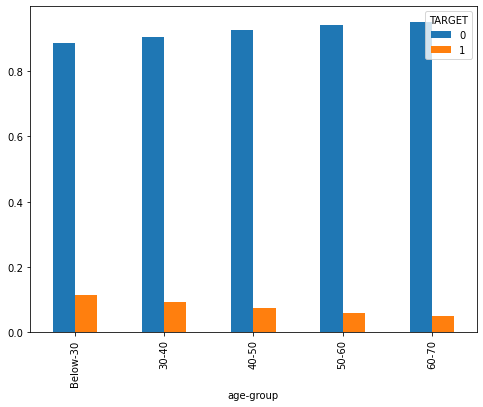

In [187]:
current.groupby('age-group')['TARGET'].value_counts(normalize=True).unstack().plot.bar(figsize=(8, 6))

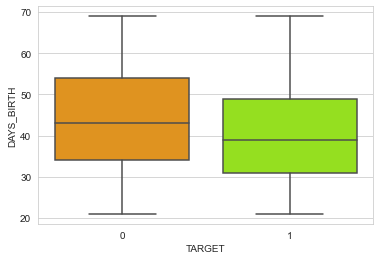

In [219]:
#current['DAYS_BIRTH'].max(),current['DAYS_BIRTH'].min()
sns.set_palette('gist_rainbow')
sns.boxplot(x='TARGET', y='DAYS_BIRTH', data=current);

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Days Employed</h2>
</div>


In [129]:
current['DAYS_EMPLOYED'].max(),current['DAYS_EMPLOYED'].min()

(365243, -17912)

In [130]:
for i in range(len(current)):
    if current.loc[i,'DAYS_EMPLOYED'] < 0:
        current.loc[i,'DAYS_EMPLOYED'] = current.loc[i,'DAYS_EMPLOYED'] * (-1)
    else:
        pass;

In [199]:
current['DAYS_EMPLOYED'].max(),current['DAYS_EMPLOYED'].min()

(365243, 0)

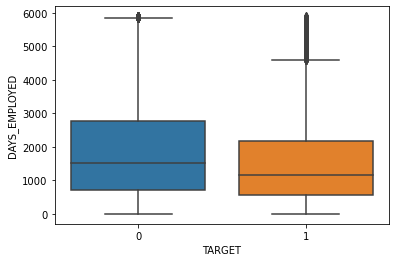

In [206]:
sns.boxplot(x='TARGET', y='DAYS_EMPLOYED', data=current[current.DAYS_EMPLOYED<5900]);

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>8. Days Birth</h2>
</div>

In [ ]:
bins = [0,30,40,50,60,70]
labels = ['Below-30','30-40','40-50','50-60','60-70']
current['age-group'] = pd.cut(current['DAYS_BIRTH'], bins, labels=labels);

In [207]:
current['DAYS_EMPLOYED_YEARS'] = round((current['DAYS_EMPLOYED']/365),0)

<ipython-input-207-ae152441c772>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [208]:
current['DAYS_EMPLOYED_YEARS'].max(),current['DAYS_EMPLOYED_YEARS'].min()

(1001.0, 0.0)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Count of Family members and Children and remove OUTLIERS</h2>
</div>

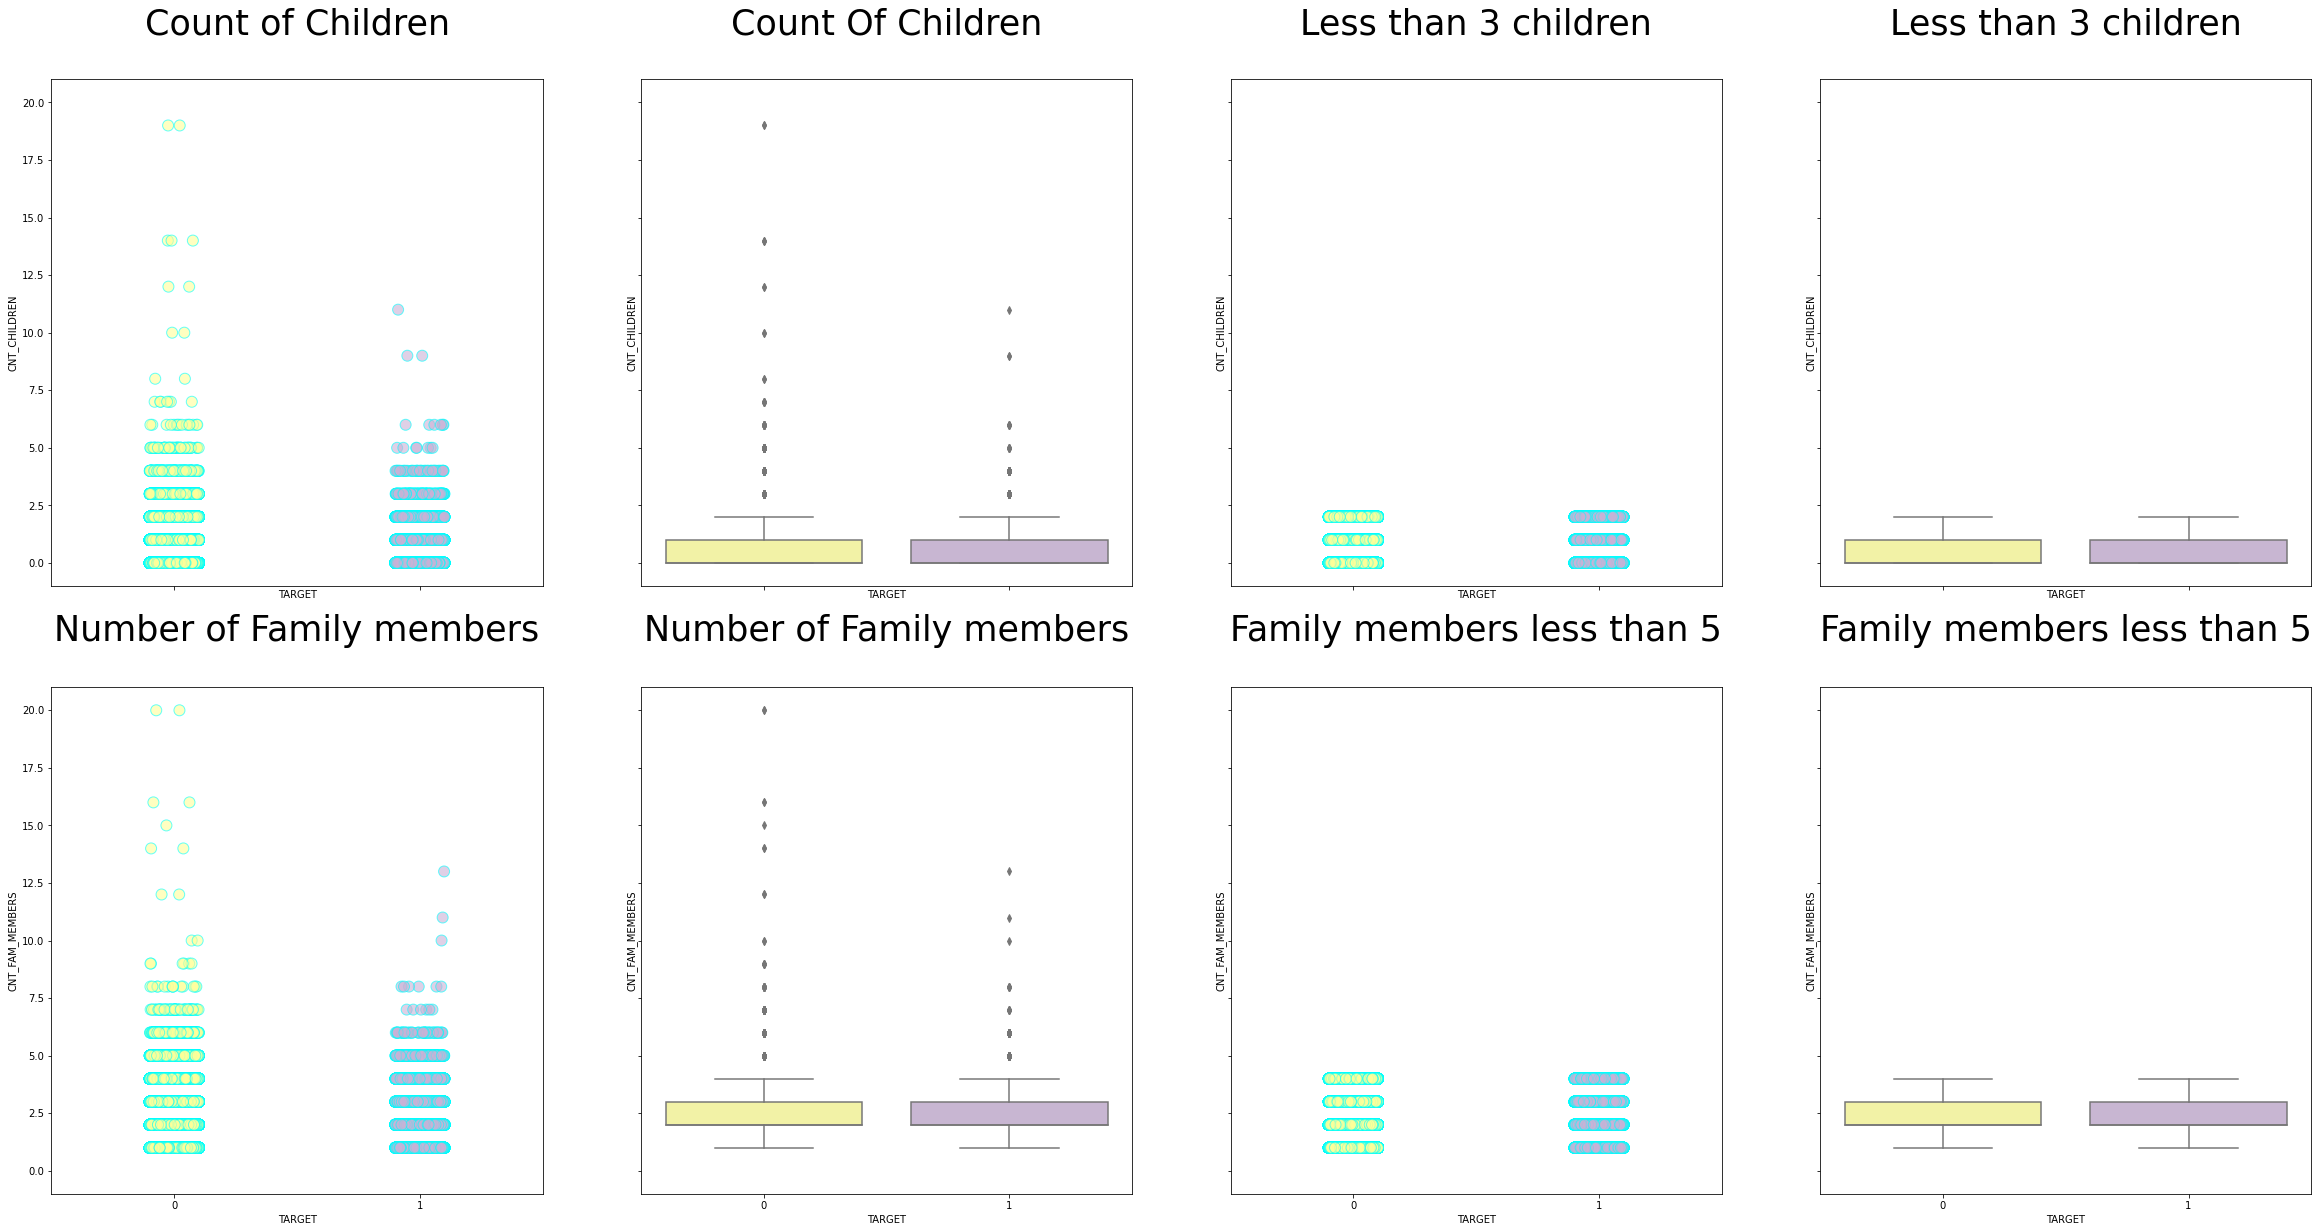

In [217]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, sharex=True)
#fig.suptitle("The main heading", fontsize=20)
sns.set_palette('Paired_r')

sns.stripplot(ax=axes[0][0],x='TARGET', y ='CNT_CHILDREN', data =current, jitter=True, alpha=0.6, size=11, edgecolor ='cyan', linewidth=1);
axes[0][0].set_title("Count of Children\n", fontsize=35)


sns.boxplot(ax=axes[0][1],x='TARGET', y ='CNT_CHILDREN', data =current);
axes[0][1].set_title("Count Of Children\n", fontsize=35)

sns.stripplot(ax=axes[0][2],x='TARGET', y ='CNT_CHILDREN', data =current[current['CNT_CHILDREN']<3], jitter=True, alpha=0.6, size=11, edgecolor ='cyan', linewidth=1);
axes[0][2].set_title("Less than 3 children\n",fontsize=35)

sns.boxplot(ax=axes[0][3],x='TARGET', y ='CNT_CHILDREN', data =current[current['CNT_CHILDREN']<3]);
axes[0][3].set_title("Less than 3 children\n",fontsize=35)

sns.stripplot(ax=axes[1][0],x='TARGET', y ='CNT_FAM_MEMBERS', data =current, jitter=True, alpha=0.6, size=11, edgecolor ='cyan', linewidth=1);
axes[1][0].set_title("Number of Family members\n",fontsize=35)


sns.boxplot(ax=axes[1][1],x='TARGET', y ='CNT_FAM_MEMBERS', data =current);
axes[1][1].set_title("Number of Family members\n",fontsize=35)

sns.stripplot(ax=axes[1][2],x='TARGET', y ='CNT_FAM_MEMBERS', data =current[current['CNT_FAM_MEMBERS'] <5], jitter=True, alpha=0.6, size=11, edgecolor ='cyan', linewidth=1);
axes[1][2].set_title("Family members less than 5\n",fontsize=35)


sns.boxplot(ax=axes[1][3],x='TARGET', y ='CNT_FAM_MEMBERS', data =current[current['CNT_FAM_MEMBERS'] <5]);
axes[1][3].set_title("Family members less than 5\n",fontsize=35)




fig.set_size_inches(40.5, 20.5, forward=True)

plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>CODE_GENDER</h2>
</div>

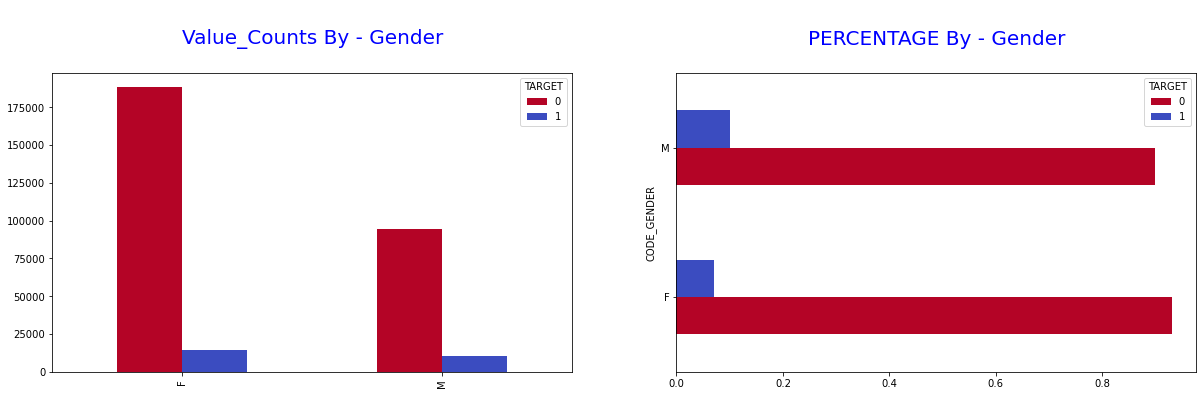

In [226]:
fig, axes = plt.subplots(ncols=2, sharey=False, sharex=False)

current.groupby('CODE_GENDER')['TARGET'].value_counts().drop('XNA',axis=0).unstack().plot.bar(ax=axes[0], colormap='coolwarm_r');
axes[0].set_title("\nValue_Counts By - Gender\n",fontsize=20, color='Blue')
axes[0].set_xlabel("")

current.groupby('CODE_GENDER')['TARGET'].value_counts(normalize=True).drop('XNA',axis=0).unstack().plot.barh(ax=axes[1], colormap='coolwarm_r');
axes[1].set_title("\nPERCENTAGE By - Gender\n",fontsize=20, color='Blue')
axes[1].set_xlabel("")


fig.set_size_inches(20.5, 5.5, forward=True)

plt.show()

<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#6495ED; font-size:18px'>Conclusion</h1>
</div>

- Males have more difficulty in payment than Females 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>FLAG_OWN_REALTY</h2>
</div>

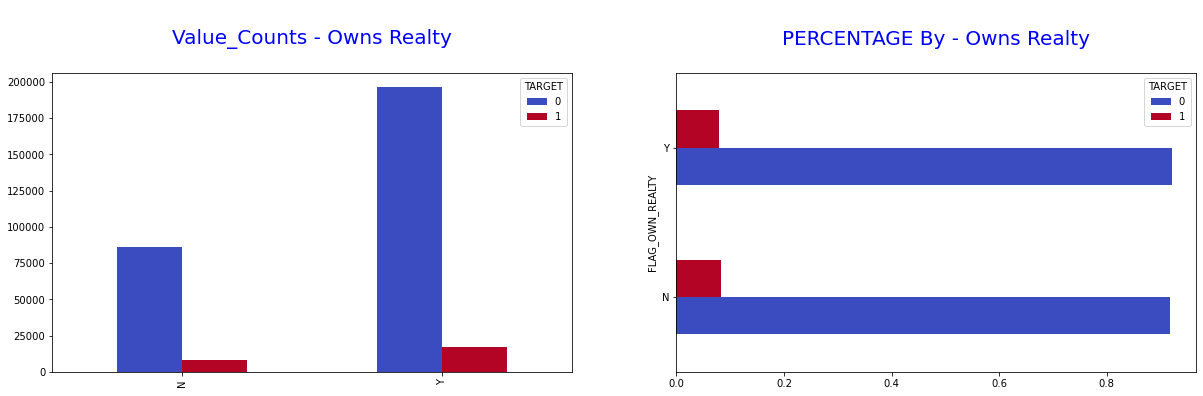

In [232]:
fig, axes = plt.subplots(ncols=2, sharey=False, sharex=False)


current.groupby('FLAG_OWN_REALTY')['TARGET'].value_counts().unstack().plot.bar(ax=axes[0], colormap='coolwarm');
axes[0].set_title("\nValue_Counts - Owns Realty\n",fontsize=20, color='Blue')
axes[0].set_xlabel("")

current.groupby('FLAG_OWN_REALTY')['TARGET'].value_counts(normalize=True).unstack().plot.barh(ax=axes[1], colormap='coolwarm');
axes[1].set_title("\nPERCENTAGE By - Owns Realty\n",fontsize=20, color='Blue')
axes[1].set_xlabel("")

fig.set_size_inches(20.5, 5.5, forward=True)

plt.show()

<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#6495ED; font-size:18px'>Conclusion</h1>
</div>

- Applicants who DO NOT own a Realty have difficulty in making payments

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>FLAG_OWN_CAR</h2>
</div>

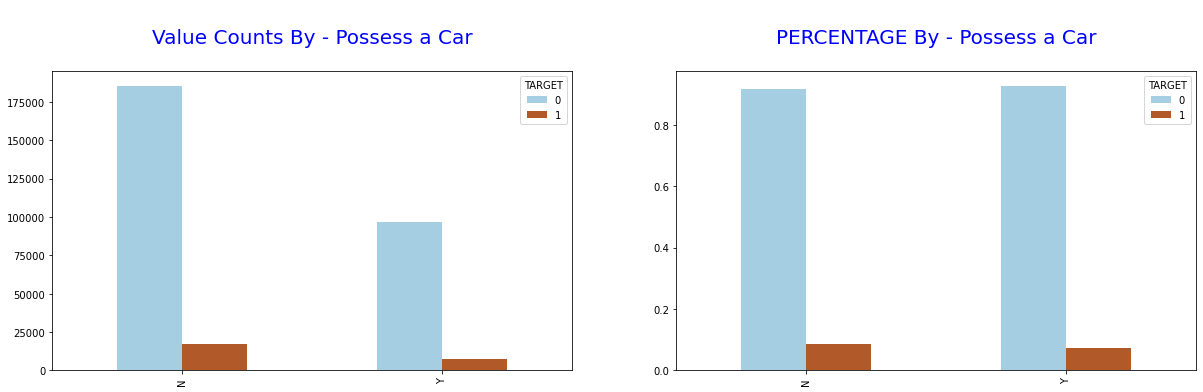

In [236]:
fig, axes = plt.subplots(ncols=2, sharey=False, sharex=False)


current.groupby('FLAG_OWN_CAR')['TARGET'].value_counts().unstack().plot.bar(ax=axes[0],  colormap='Paired');
axes[0].set_title("Value Counts By - Possess a Car\n",fontsize=20, color='Blue')
axes[0].set_xlabel("")

current.groupby('FLAG_OWN_CAR')['TARGET'].value_counts(normalize=True).unstack().plot.bar(ax=axes[1],  colormap='Paired');
axes[1].set_title("\nPERCENTAGE By - Possess a Car\n",fontsize=20, color='Blue')
axes[1].set_xlabel("")

fig.set_size_inches(20.5, 5.5, forward=True)

plt.show()

<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#6495ED; font-size:18px'>Conclusion</h1>
</div>

- Applicants who DO NOT own a car have difficulty in payments as compared to ones who own a car

<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Correlation </h1>
</div>

- Income and Age Group

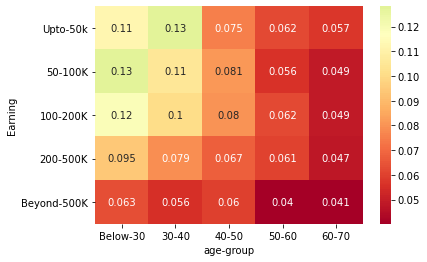

In [245]:
sns.heatmap(pd.pivot_table(data=current, index='Earning', columns='age-group', values='TARGET'), annot=True, cmap="RdYlGn", center=0.117);

<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#6495ED; font-size:18px'>Conclusion</h1>
</div>

- Applicants in the age group of 50-70 and earning beyond 500K annually are likely to have diffculty with payments
- Applicants below 30 & between 30-40 with earnings between 50-100K & upto 50K are most likely to make regular timely payments

- Education and Age Group

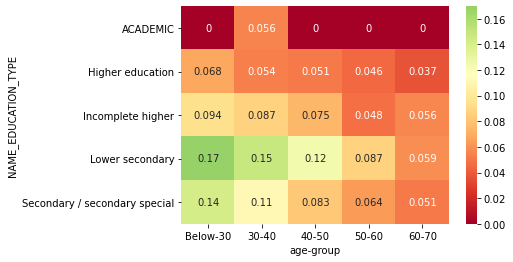

In [252]:
sns.heatmap(pd.pivot_table(data=current, index='NAME_EDUCATION_TYPE', columns='age-group', values='TARGET'), annot=True, cmap="RdYlGn", center=0.117);

- Education Type and Earning

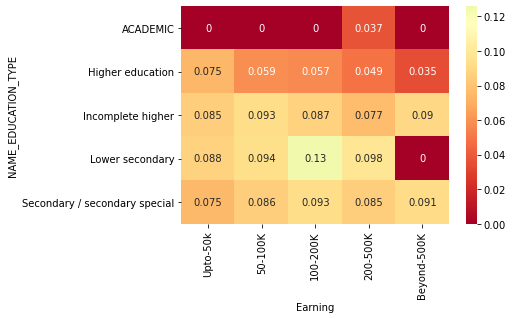

In [254]:
sns.heatmap(pd.pivot_table(data=current, index='NAME_EDUCATION_TYPE', columns='Earning', values='TARGET'), annot=True, cmap="RdYlGn", center=0.117);

<div class="alert" style="background-color:#fff; color:maroon; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#6495ED; font-size:18px'>Conclusion</h1>
</div>

- Applicants earning in the range of 100-200K with Lower secondary education are most likely to pay instalments in time

